# Data in

In [5]:
import os
import netCDF4
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from scipy import integrate
import scipy.stats as sci
import scipy.signal as sig
import seaborn as sns
from importlib import reload
import functions as f

f = reload(f)

#import warnings; warnings.simplefilter('ignore')

In [12]:
import numpy as np
a = np.zeros((9, 5))
b = np.zeros((10, 2))

with open('test.npy', 'wb') as f:

    np.save('f', [a, b])

with open('test.npy', 'rb') as f:

    print(np.load(f))

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [2]:
file5m = '/storage/silver/scenario/si818415/phd/5mLES/runs2.nc'
data5m = Dataset(file5m, mode='r')
my_w_th = data5m.variables['w_th'][:,:,:]
th_p = data5m.variables['th_p'][:,:,:]

In [3]:
mydir_runs = '/storage/silver/scenario/si818415/phd/'
myfolder = ['5mLES/','20mLES/', '25mLES_animat/', '50mLES/','100mLES/','200mLES/', '400mLES/', '800mLES/']
myfile_run = []

myfile_run.append("diagnostics_3d_ts_13200.nc")
myfile_run.append("cbl_13200.nc")

myfile_run.append("cbl_13500.nc")
myfile_run.append("cbl_13800.nc")
myfile_run.append("cbl_14100.nc")
myfile_run.append("cbl_14400.nc")
myfile_run.append("cbl_14700.nc")
myfile_run.append("cbl_15000.nc")
    
data_sg_run0  = Dataset(str(mydir_runs)+myfolder[0]+'subgrid/diagnostics_ts_13200.nc', mode='r')
data_run0 = Dataset(str(mydir_runs)+myfolder[0]+myfile_run[0], mode='r')
data_run1 = Dataset(str(mydir_runs)+myfolder[1]+myfile_run[1], mode='r')

data_run2a = Dataset(str(mydir_runs)+myfolder[2]+myfile_run[2], mode='r')
data_run2b = Dataset(str(mydir_runs)+myfolder[2]+myfile_run[3], mode='r')
data_run2c = Dataset(str(mydir_runs)+myfolder[2]+myfile_run[4], mode='r')
data_run2d = Dataset(str(mydir_runs)+myfolder[2]+myfile_run[5], mode='r')
data_run2e = Dataset(str(mydir_runs)+myfolder[2]+myfile_run[6], mode='r')
data_run2f = Dataset(str(mydir_runs)+myfolder[2]+myfile_run[7], mode='r')

data_run3 = Dataset(str(mydir_runs)+myfolder[3]+myfile_run[1], mode='r')
data_run4 = Dataset(str(mydir_runs)+myfolder[4]+myfile_run[1], mode='r')
data_run5 = Dataset(str(mydir_runs)+myfolder[5]+myfile_run[1], mode='r')
data_run6 = Dataset(str(mydir_runs)+myfolder[6]+myfile_run[1], mode='r')
data_run7 = Dataset(str(mydir_runs)+myfolder[7]+myfile_run[1], mode='r')

In [4]:
w_run5 = data_run0.variables['w'][0,:,:,:]
w_run20 = data_run1.variables['w'][0,:,:,:] # 2 time stamps

w_run25a = data_run2a.variables['w'][:,:,:,:]

w_run50 = data_run3.variables['w'][0,:,:,:]
w_run100 = data_run4.variables['w'][0,:,:,:]
w_run200 = data_run5.variables['w'][0,:,:,:]
w_run400 = data_run6.variables['w'][0,:,:,:] # 2 time stamps
w_run800 = data_run7.variables['w'][0,:,:,:]

# Filtering

In [5]:
plot_dir = '/storage/silver/scenario/si818415/phd/plots/'

In [45]:
file20f = '/storage/silver/scenario/si818415/phd/20mLES/20m_gauss_S_ij/cbl_13200_gauss_filter_ga00.nc'
data20f = Dataset(file20f, mode='r')
file20_4D = '/storage/silver/scenario/si818415/phd/20mLES/20m_gauss_S_ij_4Delta/cbl_13200_gauss_filter_ga00.nc'
data20_4D = Dataset(file20_4D, mode='r')

In [97]:
mydir20 = '/storage/silver/MONC_data/Alanna/20m_gauss_sig_Delta_match' #'20m_gauss_match_sq6/'
myfile20 = ['/cbl_13200__filter_ga00.nc']

for i in range(5):
    myfile20.append(f'/cbl_13200__filter_ga{i:02d}.nc')#"cbl_13200_gaussian_filter_ga0{}.nc".format(str(i)))

data0_20 = Dataset(str(mydir20)+str('_25')+myfile20[0], mode='r')
data1_20 = Dataset(str(mydir20)+myfile20[1], mode='r')
data2_20 = Dataset(str(mydir20)+myfile20[2], mode='r')
data3_20 = Dataset(str(mydir20)+myfile20[3], mode='r')
data4_20 = Dataset(str(mydir20)+myfile20[4], mode='r')
data5_20 = Dataset(str(mydir20)+myfile20[5], mode='r')
#data5_20 = Dataset(str(mydir20)+myfile20[5], mode='r')
# data6_20 = Dataset(str(mydir20)+myfile20[6], mode='r')
# data7_20 = Dataset(str(mydir20)+myfile20[7], mode='r')
#data8_20 = Dataset(str(mydir20)+myfile20[8], mode='r')
#data9_20 = Dataset(str(mydir20)+myfile20[9], mode='r')

In [98]:
print(data0_20.getncattr('sigma'))
print(data1_20.getncattr('sigma'))
print(data2_20.getncattr('sigma'))
print(data3_20.getncattr('sigma')) 
print(data4_20.getncattr('sigma'))
print(data5_20.getncattr('sigma'))
# print(data6_20.getncattr('sigma'))
# print(data7_20.getncattr('sigma'))

25
50
100
200
400
800


In [99]:
w_filt20 = np.zeros((6,240,240,100))

w_filt20[0,:,:,:] = data0_20.variables['w_on_w_r'][0,:,:,:]
w_filt20[1,:,:,:] = data1_20.variables['w_on_w_r'][0,:,:,:]
w_filt20[2,:,:,:] = data2_20.variables['w_on_w_r'][0,:,:,:]
w_filt20[3,:,:,:] = data3_20.variables['w_on_w_r'][0,:,:,:]
w_filt20[4,:,:,:] = data4_20.variables['w_on_w_r'][0,:,:,:]
w_filt20[5,:,:,:] = data5_20.variables['w_on_w_r'][0,:,:,:]

In [46]:
w_pi_over2_gauss = np.zeros((2,240,240,100))

w_pi_over2_gauss[0] = data20f.variables['w_on_p_r'][0,:,:,:]
w_pi_over2_gauss[1] = data20_4D.variables['w_on_p_r'][0,:,:,:]

In [11]:
mydir20k = '/storage/silver/scenario/si818415/phd/20mLES/20m_kcut/'

myfile20k = ["cbl_13200_wave_cutoff_filter_do06.nc"]

for i in range(6):
    myfile20k.append("cbl_13200_wave_cutoff_filter_wc0{}.nc".format(str(i)))
    
data0_20k = Dataset(str(mydir20k)+myfile20k[0], mode='r') #original domain with 20m spacing
data1_20k = Dataset(str(mydir20k)+myfile20k[1], mode='r')
data2_20k = Dataset(str(mydir20k)+myfile20k[2], mode='r')
data3_20k = Dataset(str(mydir20k)+myfile20k[3], mode='r')
data4_20k = Dataset(str(mydir20k)+myfile20k[4], mode='r')
data5_20k = Dataset(str(mydir20k)+myfile20k[5], mode='r')
data6_20k = Dataset(str(mydir20k)+myfile20k[6], mode='r')
# data7_20k = Dataset(str(mydir20k)+myfile20k[7], mode='r')
# data8_20k = Dataset(str(mydir20k)+myfile20k[8], mode='r')

In [106]:
print(np.pi/data0_20k.getncattr('wavenumber'))
print(np.pi/data1_20k.getncattr('wavenumber'))
print(np.pi/data2_20k.getncattr('wavenumber'))
print(np.pi/data3_20k.getncattr('wavenumber'))
print(np.pi/data4_20k.getncattr('wavenumber'))
print(np.pi/data5_20k.getncattr('wavenumber'))
print(np.pi/data6_20k.getncattr('wavenumber'))

-3.141592653589793
24.999999999999996
49.99999999999999
99.99999999999999
199.99999999999997
399.99999999999994
799.9999999999999


In [12]:
w_filt20k = np.zeros((7,240,240,100))

w_filt20k[0,:,:,:] = w_run20 
w_filt20k[1,:,:,:] = data1_20k.variables['w_on_w_r'][0,:,:,:]
w_filt20k[2,:,:,:] = data2_20k.variables['w_on_w_r'][0,:,:,:]
w_filt20k[3,:,:,:] = data3_20k.variables['w_on_w_r'][0,:,:,:]
w_filt20k[4,:,:,:] = data4_20k.variables['w_on_w_r'][0,:,:,:]
w_filt20k[5,:,:,:] = data5_20k.variables['w_on_w_r'][0,:,:,:]
w_filt20k[6,:,:,:] = data6_20k.variables['w_on_w_r'][0,:,:,:]

In [107]:
dx = dy = 20 #metres

options_spec = {
           'spec_method': 'Durran',    # [Durran, ndimage] Use Durran method 
                                        # (which actually also uses ndimage),
                                       #   or faster, less accurate ndimage method
           'spec_compensation': False, # With spec_method: 'durran', use Durran/Tanguay method 
                                        # to compensate for systematic 
                                       # noise in the annular summation (does not preserve energy)
           'spec_restrict': False       # With spec_method: 'durran', restrict the spec_2d
                                        # result to values below the Nyquist frequency.
             }


#w_spec_filt0k, w_kpo_filt0k = f.spectra_2d(w_filt20k[0,:,:,:], dx, dy, options_spec)
#print("sigma 25")
w_spec_filt1k, w_kpo_filt1k = f.spectra_2d(w_filt20k[1,:,:,:], dx, dy, options_spec)
#print("sigma 50")
w_spec_filt2k, w_kpo_filt2k = f.spectra_2d(w_filt20k[2,:,:,:], dx, dy, options_spec)
#print("sigma 100")
w_spec_filt3k, w_kpo_filt3k = f.spectra_2d(w_filt20k[3,:,:,:], dx, dy, options_spec)
#print("sigma 200")
w_spec_filt4k, w_kpo_filt4k = f.spectra_2d(w_filt20k[4,:,:,:], dx, dy, options_spec)
#print("sigma 400")
w_spec_filt5k, w_kpo_filt5k = f.spectra_2d(w_filt20k[5,:,:,:], dx, dy, options_spec)
#print("sigma 522")
w_spec_filt6k, w_kpo_filt6k = f.spectra_2d(w_filt20k[6,:,:,:], dx, dy, options_spec)
#print("sigma 522")

Preparing map
Preparing map
Preparing map
Preparing map
Preparing map
Preparing map


In [32]:
file20g = '/storage/silver/MONC_data/Alanna/20m_gauss_dyn/'
myfile = []
for i in range(4):
    myfile.append(f'cbl_13200__filter_ga{i:02d}.nc')
                  
data20g_2D = Dataset(file20g+str(myfile[0]), mode='r')
data20g_4D = Dataset(file20g+str(myfile[1]), mode='r')
data20g_8D = Dataset(file20g+str(myfile[2]), mode='r')
data20g_16D = Dataset(file20g+str(myfile[3]), mode='r')

In [90]:
print(data20g_2D.getncattr('sigma'))

16.32993161855452


In [34]:
w_filt20g_dyn = np.zeros((4,240,240,100))

w_filt20g_dyn[0,:,:,:] = data20g_2D.variables['w_on_p_r'][0,:,:,:]
w_filt20g_dyn[1,:,:,:] = data20g_4D.variables['w_on_p_r'][0,:,:,:]
w_filt20g_dyn[2,:,:,:] = data20g_8D.variables['w_on_p_r'][0,:,:,:]
w_filt20g_dyn[3,:,:,:] = data20g_16D.variables['w_on_p_r'][0,:,:,:]

# Calcs

In [13]:
Q_star = 241/(1*1004) # 0.24
w_star = 2

# Spectra

In [56]:
dx = dy = [5,20,25,50,100,200,400,800] #metres

options_spec = {
           'spec_method': 'Durran',    # [Durran, ndimage] Use Durran method 
                                        # (which actually also uses ndimage),
                                       #   or faster, less accurate ndimage method
           'spec_compensation': False, # With spec_method: 'durran', use Durran/Tanguay method 
                                        # to compensate for systematic 
                                       # noise in the annular summation (does not preserve energy)
           'spec_restrict': False       # With spec_method: 'durran', restrict the spec_2d
                                        # result to values below the Nyquist frequency.
             }


w_spec5, w_kpo5 = f.spectra_2d(w_run5[:,:,:], dx[0], dy[0], options_spec)
print(5)
w_spec20, w_kpo20 = f.spectra_2d(w_run20[:,:,:], dx[1], dy[1], options_spec)
w_spec25, w_kpo25 = f.spectra_2d(w_run25a[0,:,:,:], dx[2], dy[2], options_spec)
print(25)
w_spec50, w_kpo50 = f.spectra_2d(w_run50[:,:,:], dx[3], dy[3], options_spec)
w_spec100, w_kpo100 = f.spectra_2d(w_run100[:,:,:], dx[4], dy[4], options_spec)
print(100)
w_spec200, w_kpo200 = f.spectra_2d(w_run200[:,:,:], dx[5], dy[5], options_spec)
w_spec400, w_kpo400 = f.spectra_2d(w_run400[:,:,:], dx[6], dy[6], options_spec)
w_spec800, w_kpo800 = f.spectra_2d(w_run800[:,:,:], dx[7], dy[7], options_spec)

Preparing map
5
Preparing map
Preparing map
25
Preparing map
Preparing map
100
Preparing map
Preparing map
Preparing map


In [100]:
dx = dy = 20 #metres

options_spec = {
           'spec_method': 'Durran',    # [Durran, ndimage] Use Durran method 
                                        # (which actually also uses ndimage),
                                       #   or faster, less accurate ndimage method
           'spec_compensation': False, # With spec_method: 'durran', use Durran/Tanguay method 
                                        # to compensate for systematic 
                                       # noise in the annular summation (does not preserve energy)
           'spec_restrict': False       # With spec_method: 'durran', restrict the spec_2d
                                        # result to values below the Nyquist frequency.
             }


w_spec_filt0, w_kpo_filt0 = f.spectra_2d(w_filt20[0,:,:,:], dx, dy, options_spec)
print("sigma 25")
w_spec_filt1, w_kpo_filt1 = f.spectra_2d(w_filt20[1,:,:,:], dx, dy, options_spec)
print("sigma 50")
w_spec_filt2, w_kpo_filt2 = f.spectra_2d(w_filt20[2,:,:,:], dx, dy, options_spec)
print("sigma 100")
w_spec_filt3, w_kpo_filt3 = f.spectra_2d(w_filt20[3,:,:,:], dx, dy, options_spec)
print("sigma 200")
w_spec_filt4, w_kpo_filt4 = f.spectra_2d(w_filt20[4,:,:,:], dx, dy, options_spec)
print("sigma 400")
w_spec_filt5, w_kpo_filt5 = f.spectra_2d(w_filt20[5,:,:,:], dx, dy, options_spec)
print("sigma 522")

Preparing map
sigma 16
Preparing map
sigma 32
Preparing map
sigma 65
Preparing map
sigma 130
Preparing map
sigma 261
Preparing map
sigma 522


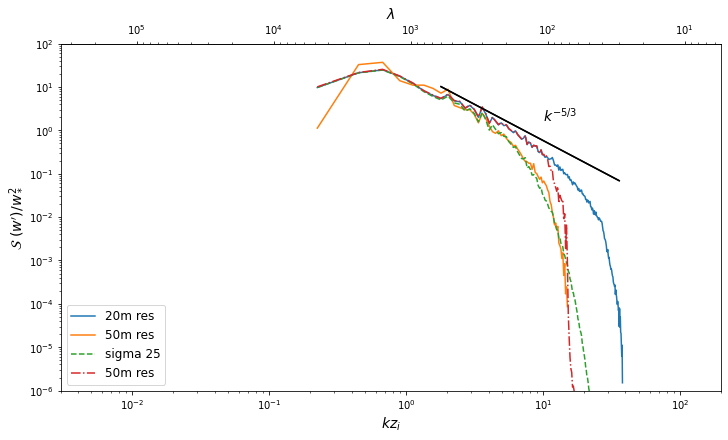

In [120]:
fig, ax = plt.subplots(figsize=(10,6), constrained_layout=True)

turb_slope_x = np.linspace(0.02,0.4,100)
turb_slope_y = turb_slope_x**(-5/3)

filt_slope_x = np.linspace(0.5,1,50)
filt_slope_y = filt_slope_x**(-11/2)

my_w_star = w_star**2
z_set = [100,25]
z_i = 1080

#ax.loglog(w_kpo5*z_i/(2*np.pi), w_spec5[:,z_set[0]]/my_w_star, label="5m res")
ax.loglog(w_kpo20*z_i/(2*np.pi), w_spec20[:,z_set[1]]/my_w_star, label="20m res")
#ax.loglog(w_kpo25*z_i/(2*np.pi), w_spec25[:,z_set[1]]/my_w_star, label="25m res")
#ax.loglog(w_kpo5[36]*z_i/(2*np.pi), w_spec5[36,z_set[0]]/my_w_star, 'ko', label="5m crit")
ax.loglog(w_kpo50*z_i/(2*np.pi), w_spec50[:,z_set[1]]/my_w_star, label="50m res")
# ax.loglog(w_kpo100*z_i/(2*np.pi), w_spec100[:,z_set[1]]/my_w_star, label="100m res")
# ax.loglog(w_kpo200*z_i/(2*np.pi), w_spec200[:,z_set[1]]/my_w_star, label="200m res")
# ax.loglog(w_kpo400*z_i/(2*np.pi), w_spec400[:,z_set[1]]/my_w_star, label="400m res")
# ax.loglog(w_kpo800*z_i/(2*np.pi), w_spec800[:,z_set[1]]/my_w_star, label="800m res")
ax.loglog(90*turb_slope_x, 0.015*turb_slope_y, 'k-')
ax.text(10, 1.6, r'$k^{-5/3}$', fontsize=14)

ax.loglog(w_kpo_filt0*z_i/(2*np.pi), w_spec_filt0[:,z_set[1]]/my_w_star, '--', label="sigma 25")
# ax.loglog(w_kpo_filt1*z_i/(2*np.pi), w_spec_filt1[:,z_set[1]]/my_w_star, '--', label="sigma 50")
# ax.loglog(w_kpo_filt2*z_i/(2*np.pi), w_spec_filt2[:,z_set[1]]/my_w_star, '--', label="sigma 100")
# ax.loglog(w_kpo_filt3*z_i/(2*np.pi), w_spec_filt3[:,z_set[1]]/my_w_star, '--', label="sigma 200")
# ax.loglog(w_kpo_filt4*z_i/(2*np.pi), w_spec_filt4[:,z_set[1]]/my_w_star, '--', label="sigma 400")
# ax.loglog(w_kpo_filt5*z_i/(2*np.pi), w_spec_filt5[:,z_set[1]]/my_w_star, '--', label="sigma 800")

w_spec_filt3k, w_kpo_filt3k 

#ax.loglog(w_kpo20*z_i/(2*np.pi), w_spec20[:,z_set[1]]/my_w_star, label="20m res")
#ax.loglog(w_kpo_filt1k*z_i/(2*np.pi), w_spec_filt1k[:,z_set[1]]/my_w_star, label="25m res")
#ax.loglog(w_kpo5[36]*z_i/(2*np.pi), w_spec5[36,z_set[0]]/my_w_star, 'ko', label="5m crit")
ax.loglog(w_kpo_filt2k*z_i/(2*np.pi), w_spec_filt2k[:,z_set[1]]/my_w_star, '-.', label="50m res")
# ax.loglog(w_kpo_filt3k*z_i/(2*np.pi), w_spec_filt3k[:,z_set[1]]/my_w_star, '-.', label="100m res")
# ax.loglog(w_kpo_filt4k*z_i/(2*np.pi), w_spec_filt4k[:,z_set[1]]/my_w_star, '-.', label="200m res")
# ax.loglog(w_kpo_filt5k*z_i/(2*np.pi), w_spec_filt5k[:,z_set[1]]/my_w_star, '-.', label="400m res")
# ax.loglog(w_kpo_filt6k*z_i/(2*np.pi), w_spec_filt6k[:,z_set[1]]/my_w_star, '-.', label="800m res")
ax.loglog(90*turb_slope_x, 0.015*turb_slope_y, 'k-')


#ax.loglog(125*filt_slope_x, 0.0006*filt_slope_y, 'k-')
#ax.text(80, 0.01, r'$k^{-11/2}$', fontsize=14)
ax.legend(fontsize=12, loc='lower left')
ax.set_xlabel("$k z_i$", fontsize=14)
ax.set_ylabel("$\\mathcal{S}$ $(w')/w_*^2$", fontsize=14) #("$\mathcal{S}$ ($w'$)", fontsize=14)
ax.set_ylim(ymax=1e2, ymin=1e-6)
ax.set_xlim(xmax=200, xmin=0.003)
#plt.xlim(xmax=1e0, xmin=1e-3)

def ktol(kz):
    l = (1/kz)*np.mean(z_i) #2*np.pi/k
    return l


def ltok(l):
    kz = (1/l)*np.mean(z_i) #2*np.pi/l
    return kz


secax = ax.secondary_xaxis('top', functions=(ltok, ktol))
secax.set_xlabel('$\\lambda$', fontsize=14)

plt.savefig(plot_dir+"runs_w_spec.png", pad_inches=0)

In [ ]:
truth_line = truth(w_kpo5)
truth_spec = np.zeros_like(truth_line)
z_set = [100,25]

for i in [0,1,3,5]:
    if i == 5:
        j = i-1
    else: 
        j = i
    truth_spec[j] = w_spec5[i,z_set[0]]
    
filt_w_spec20 = sig.savgol_filter(w_spec20[:, z_set[1]], 3, 2)
    
truth_spec[2] = filt_w_spec20[2]
truth_spec[4] = w_spec20[5, z_set[1]]

for k in range(len(truth_line)-5):
    truth_spec[k+5] = truth_line[k+5]
    
truth_spec[-1] = truth_line[-1]

truth_spec = sig.savgol_filter(truth_spec,5,3)
temp = sig.savgol_filter(truth_spec,5,3)
truth_spec[5] = temp[5]

NameError: name 'truth' is not defined

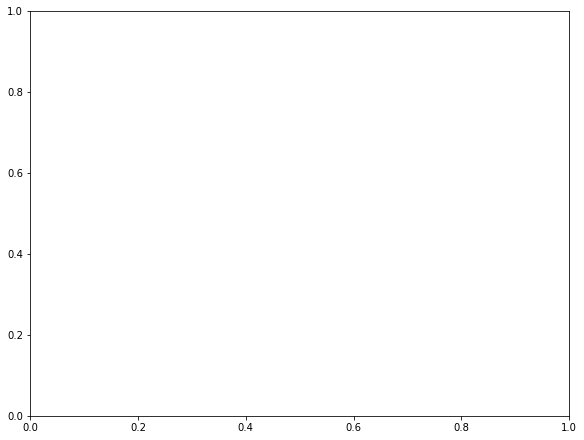

In [88]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

truth_line = truth(w_kpo5)

my_w_star = w_star**2
z_set = [100,25]
z_i = 1080

ax.loglog(w_kpo5, w_spec5[:,z_set[0]], label="5m res")
#ax.loglog(w_kpo5[36], w_spec5[36,z_set[0]], 'ko', label="5m crit")
ax.loglog(w_kpo20, w_spec20[:,z_set[1]], label="20m res")
ax.loglog(w_kpo25, w_spec25[:,z_set[1]], label="25m res")
ax.loglog(w_kpo50, w_spec50[:,z_set[1]], label="50m res")
ax.loglog(w_kpo100, w_spec100[:,z_set[1]], label="100m res")
ax.loglog(w_kpo200, w_spec200[:,z_set[1]], label="200m res")
ax.loglog(w_kpo400, w_spec400[:,z_set[1]], label="400m res")
ax.loglog(w_kpo800, w_spec800[:,z_set[1]], label="800m res")

ax.loglog(w_kpo5, truth_spec, 'k', label="truth spectra")

#ax.loglog(w_kpo5[5], truth_spec[5], 'ko', label="5m crit")

#ax.loglog(w_kpo5, truth_line, 'k', label="truth line")
#ax.text(10, 1.6, r'$k^{-5/3}$', fontsize=14)

ax.legend(fontsize=12, loc='upper right')
ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("$\\mathcal{S}$ $(w')$", fontsize=14) #("$\mathcal{S}$ ($w'$)", fontsize=14)
ax.set_ylim(ymax=2e2, ymin=5e-3)
ax.set_xlim(xmax=1, xmin=1e-3)
#plt.xlim(xmax=1e0, xmin=1e-3)

def ktol(kz):
    l = (1/kz) #2*np.pi/k
    return l


def ltok(l):
    kz = (1/l) #2*np.pi/l
    return kz


secax = ax.secondary_xaxis('top', functions=(ltok, ktol))
secax.set_xlabel('$\\lambda$', fontsize=14)

plt.savefig(plot_dir+"runs_w_spec_and_truth.png", pad_inches=0)

In [ ]:
def truth(k, c = 0.01408366071):

    turb_slope_x = k
    turb_slope_y = c*turb_slope_x**(-5/3)
    
    truth = turb_slope_y
    return truth

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)

truth5 = truth(w_kpo5)
truth20 = truth(w_kpo20)
truth25 = truth(w_kpo25)
truth50 = truth(w_kpo50)
truth100 = truth(w_kpo100)
truth200 = truth(w_kpo200)
truth400 = truth(w_kpo400)
truth800 = truth(w_kpo800)


ax.loglog(w_kpo5, sig.savgol_filter(w_spec5[:,z_set[0]], 3, 2)/truth5, label="$\\Delta =$ 5m ")
ax.loglog(w_kpo20, sig.savgol_filter(w_spec20[:,z_set[1]], 3, 2)/truth20, label="$\\Delta =$ 20m ")
ax.loglog(w_kpo25, sig.savgol_filter(w_spec25[:,z_set[1]], 3, 2)/truth25, label="$\\Delta =$ 25m ")
ax.loglog(w_kpo50, sig.savgol_filter(w_spec50[:,z_set[1]], 3, 2)/truth50, label="$\\Delta =$ 50m ")
ax.loglog(w_kpo100, sig.savgol_filter(w_spec100[:,z_set[1]], 3, 2)/truth100, label="$\\Delta =$ 100m ")
ax.loglog(w_kpo200, sig.savgol_filter(w_spec200[:,z_set[1]], 3, 2)/truth200, label="$\\Delta =$ 200m ")
ax.loglog(w_kpo400, sig.savgol_filter(w_spec400[:,z_set[1]], 3, 2)/truth400, label="$\\Delta =$ 400m ")
ax.loglog(w_kpo800, sig.savgol_filter(w_spec800[:,z_set[1]], 3, 2)/truth800, label="$\\Delta =$ 800m")

#ax.loglog(turb_slope_x, turb_slope_y, 'k-')

ax.legend(fontsize=12, loc='lower left')
ax.set_xlabel("k $\\Delta$ ($k = 2 \pi$ / $\lambda$)", fontsize=14)
ax.set_ylabel("$\\mathcal{S}$ $(w')$ / $\\mathcal{S}_{truth}$ $(w')$", fontsize=16) 

ax.set_ylim(ymax=1.7, ymin=1e-3)
ax.set_xlim(xmax=1, xmin=0.001)
plt.hlines(1, -2, 2, 'k')

def ktol(k):
    l = (2*np.pi/k) #2*np.pi/k
    return l


def ltok(l):
    k = (2*np.pi/l) #2*np.pi/l
    return k


secax = ax.secondary_xaxis('top', functions=(ltok, ktol))
secax.set_xlabel('$\\lambda$', fontsize=14)

plt.savefig(plot_dir+"shape_smag_w_spec.png", pad_inches=0)

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)

truth5 = truth(w_kpo5)
truth20 = truth(w_kpo20)
truth25 = truth(w_kpo25)
truth50 = truth(w_kpo50)
truth100 = truth(w_kpo100)
truth200 = truth(w_kpo200)
truth400 = truth(w_kpo400)
truth800 = truth(w_kpo800)


ax.loglog(w_kpo5, sig.savgol_filter(w_spec5[:,z_set[0]], 15, 2)/truth5, label="5m res/line")

#ax.loglog(w_kpo5, sig.savgol_filter(w_spec5[:,z_set[0]], 15, 2)/truth_spec, label="5m res/spectra")

ax.loglog(w_kpo20, sig.savgol_filter(w_spec20[:,z_set[1]], 15, 2)/truth20, label="20m res")
ax.loglog(w_kpo25, sig.savgol_filter(w_spec25[:,z_set[1]], 15, 2)/truth25, label="25m res")
ax.loglog(w_kpo50, sig.savgol_filter(w_spec50[:,z_set[1]], 15, 2)/truth50, label="50m res")
# ax.loglog(w_kpo100, sig.savgol_filter(w_spec100[:,z_set[1]], 9, 2)/truth100, label="100m res")
# ax.loglog(w_kpo200, sig.savgol_filter(w_spec200[:,z_set[1]], 15, 2)/truth200, label="200m res")
# ax.loglog(w_kpo400, sig.savgol_filter(w_spec400[:,z_set[1]], 15, 2)/truth400, label="400m res")
# ax.loglog(w_kpo800, sig.savgol_filter(w_spec800[:,z_set[1]], 15, 2)/truth800, label="800m res")

#ax.loglog(turb_slope_x, turb_slope_y, 'k-')

ax.legend(fontsize=12, loc='lower left')
ax.set_xlabel("$k = 2 \\pi$ / $\lambda$ ", fontsize=14)
ax.set_ylabel("$\\mathcal{S}$ $(w')$ / $\\mathcal{S}_{truth}$ $(w')$", fontsize=14) 

ax.set_ylim(ymax=2, ymin=1e-2y)
ax.set_xlim(xmax=0.8, xmin=0.004)
plt.hlines(1, -2, 2, 'k')


def ktol(k):
    l = (2*np.pi/k) #2*np.pi/k
    return l


def ltok(l):
    k = (2*np.pi/l) #2*np.pi/l
    return k


secax = ax.secondary_xaxis('top', functions=(ltok, ktol))
secax.set_xlabel('$\\lambda$', fontsize=14)

plt.savefig(plot_dir+"shape_smag_w_spec_specific.png", pad_inches=0)

Scale differently: k dx

take 5 m as truth

time av

In [ ]:
print(w_kpo5[33], w_spec5[33,100])

In [ ]:
def integ_spec(spec, k, Delta):
    """Integrates the spectra down to the 
    wavenumber corresponding to 2Delta"""
    
    k_stop = np.pi/Delta
    index_delete = np.where(k >= k_stop)[0]

    new_spec = np.delete(spec, index_delete)
    new_k = np.delete(k, index_delete)
    
    #     new_k = k
    #     new_spec = spec
    
    area = integrate.simps(new_spec, new_k)
    
    return area

In [ ]:
def integ_spec_all_out(spec, k, Delta):
    """Integrates the spectra down to the 
    wavenumber corresponding to 2Delta"""
    
    k_stop = np.pi/Delta
    index_delete = np.where(k >= k_stop)[0]

    new_spec = np.delete(spec, index_delete)
    new_k = np.delete(k, index_delete)
    
    #     new_k = k
    #     new_spec = spec
    
    area = integrate.simps(new_spec, new_k)
    
    return area, k_stop, new_k, new_spec

In [ ]:
integ_truth5_all = integ_spec_all_out(truth_spec, w_kpo5, 5)
integ_truth20_all = integ_spec_all_out(truth_spec, w_kpo5, 20)
integ_truth25_all = integ_spec_all_out(truth_spec, w_kpo5, 25)
integ_truth50_all = integ_spec_all_out(truth_spec, w_kpo5, 50)
integ_truth100_all = integ_spec_all_out(truth_spec, w_kpo5, 100)
integ_truth200_all = integ_spec_all_out(truth_spec, w_kpo5, 200)
integ_truth400_all = integ_spec_all_out(truth_spec, w_kpo5, 400)
integ_truth800_all = integ_spec_all_out(truth_spec, w_kpo5, 800)

integ_5_all = integ_spec_all_out(w_spec5[:,100], w_kpo5, 5)
integ_20_all = integ_spec_all_out(w_spec20[:,25], w_kpo20, 20)
integ_25_all = integ_spec_all_out(w_spec25[:,25], w_kpo25, 25)
integ_50_all = integ_spec_all_out(w_spec50[:,25], w_kpo50, 50)
integ_100_all = integ_spec_all_out(w_spec100[:,25], w_kpo100, 100)
integ_200_all = integ_spec_all_out(w_spec200[:,25], w_kpo200, 200)
integ_400_all = integ_spec_all_out(w_spec400[:,25], w_kpo400, 400)
integ_800_all = integ_spec_all_out(w_spec800[:,25], w_kpo800, 800)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

truth_line = truth(w_kpo5)

my_w_star = w_star**2
z_set = [100,25]
z_i = 1080

ax.loglog(integ_truth5_all[2], integ_truth5_all[3], label="5m res")
#ax.loglog(w_kpo5[36], w_spec5[36,z_set[0]], 'ko', label="5m crit")
ax.loglog(integ_truth20_all[2], integ_truth20_all[3], label="20m res")
ax.loglog(integ_truth25_all[2], integ_truth25_all[3], label="25m res")
ax.loglog(integ_truth50_all[2], integ_truth50_all[3], label="50m res")
ax.loglog(integ_truth100_all[2], integ_truth100_all[3], label="100m res")
ax.loglog(integ_truth200_all[2], integ_truth200_all[3], label="200m res")
ax.loglog(integ_truth400_all[2], integ_truth400_all[3], label="400m res")
ax.loglog(integ_truth800_all[2], integ_truth800_all[3], label="800m res")

# ax.loglog(integ_5_all[2], integ_5_all[3], label="5m res")
# #ax.loglog(w_kpo5[36], w_spec5[36,z_set[0]], 'ko', label="5m crit")
# ax.loglog(integ_20_all[2], integ_20_all[3], label="20m res")
# ax.loglog(integ_25_all[2], integ_25_all[3], label="25m res")
# ax.loglog(integ_50_all[2], integ_50_all[3], label="50m res")
# ax.loglog(integ_100_all[2], integ_100_all[3], label="100m res")
# ax.loglog(integ_200_all[2], integ_200_all[3], label="200m res")
# ax.loglog(integ_400_all[2], integ_400_all[3], label="400m res")
# ax.loglog(integ_800_all[2], integ_800_all[3], label="800m res")

# ax.loglog(w_kpo5, truth_spec, 'k', label="truth spectra")

#ax.loglog(w_kpo5[5], truth_spec[5], 'ko', label="5m crit")

#ax.loglog(w_kpo5, truth_line, 'k', label="truth line")
#ax.text(10, 1.6, r'$k^{-5/3}$', fontsize=14)

ax.legend(fontsize=12, loc='upper right')
ax.set_xlabel("$k$", fontsize=14)
ax.set_ylabel("$\\mathcal{S}$ $(w')$", fontsize=14) #("$\mathcal{S}$ ($w'$)", fontsize=14)
# ax.set_ylim(ymax=2e2, ymin=5e-3)
# ax.set_xlim(xmax=1, xmin=1e-3)
#plt.xlim(xmax=1e0, xmin=1e-3)

def ktol(kz):
    l = (1/kz) #2*np.pi/k
    return l


def ltok(l):
    kz = (1/l) #2*np.pi/l
    return kz


secax = ax.secondary_xaxis('top', functions=(ltok, ktol))
secax.set_xlabel('$\\lambda$', fontsize=14)

plt.savefig(plot_dir+"runs_w_spec_2Delta.png", pad_inches=0)

In [4]:
arr = np.zeros((9,5,2))

arr1 = np.mean(arr, axis=2)
print(np.shape(arr1))

(9, 5)


In [ ]:
integ_truth5 = integ_spec(truth_spec, w_kpo5, 5)
integ_truth20 = integ_spec(truth_spec, w_kpo5, 20)
integ_truth25 = integ_spec(truth_spec, w_kpo5, 25)
integ_truth50 = integ_spec(truth_spec, w_kpo5, 50)
integ_truth100 = integ_spec(truth_spec, w_kpo5, 100)
integ_truth200 = integ_spec(truth_spec, w_kpo5, 200)
integ_truth400 = integ_spec(truth_spec, w_kpo5, 400)
integ_truth800 = integ_spec(truth_spec, w_kpo5, 800)

integ_5 = integ_spec(w_spec5[:,100], w_kpo5, 5)
integ_20 = integ_spec(w_spec20[:,25], w_kpo20, 20)
integ_25 = integ_spec(w_spec25[:,25], w_kpo25, 25)
integ_50 = integ_spec(w_spec50[:,25], w_kpo50, 50)
integ_100 = integ_spec(w_spec100[:,25], w_kpo100, 100)
integ_200 = integ_spec(w_spec200[:,25], w_kpo200, 200)
integ_400 = integ_spec(w_spec400[:,25], w_kpo400, 400)
integ_800 = integ_spec(w_spec800[:,25], w_kpo800, 800)

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)

truth5 = truth(w_kpo5)
truth20 = truth(w_kpo20)
truth25 = truth(w_kpo25)
truth50 = truth(w_kpo50)
truth100 = truth(w_kpo100)
truth200 = truth(w_kpo200)
truth400 = truth(w_kpo400)
truth800 = truth(w_kpo800)


ax.loglog(w_kpo5*5, sig.savgol_filter(w_spec5[:,z_set[0]], 3, 2)/truth5, label="$\\Delta =$ 5m ")
ax.loglog(w_kpo20*20, sig.savgol_filter(w_spec20[:,z_set[1]], 3, 2)/truth20, label="$\\Delta =$ 20m ")
ax.loglog(w_kpo25*25, sig.savgol_filter(w_spec25[:,z_set[1]], 3, 2)/truth25, label="$\\Delta =$ 25m ")
ax.loglog(w_kpo50*50, sig.savgol_filter(w_spec50[:,z_set[1]], 3, 2)/truth50, label="$\\Delta =$ 50m ")
ax.loglog(w_kpo100*100, sig.savgol_filter(w_spec100[:,z_set[1]], 3, 2)/truth100, label="$\\Delta =$ 100m ")
ax.loglog(w_kpo200*200, sig.savgol_filter(w_spec200[:,z_set[1]], 3, 2)/truth200, label="$\\Delta =$ 200m ")
ax.loglog(w_kpo400*400, sig.savgol_filter(w_spec400[:,z_set[1]], 3, 2)/truth400, label="$\\Delta =$ 400m ")
ax.loglog(w_kpo800*800, sig.savgol_filter(w_spec800[:,z_set[1]], 3, 2)/truth800, label="$\\Delta =$ 800m")

#ax.loglog(turb_slope_x, turb_slope_y, 'k-')

ax.legend(fontsize=12, loc='lower left')
ax.set_xlabel("k $\\Delta$ ($k = 2 \pi$ / $\lambda$)", fontsize=14)
ax.set_ylabel("$\\mathcal{S}$ $(w')$ / $\\mathcal{S}_{truth}$ $(w')$", fontsize=16) 

ax.set_ylim(ymax=1.7, ymin=1e-3)
ax.set_xlim(xmax=5, xmin=0.004)
plt.hlines(1, -2, 50, 'k')

def ktol(k):
    l = (2*np.pi/k) #2*np.pi/k
    return l


def ltok(l):
    k = (2*np.pi/l) #2*np.pi/l
    return k


secax = ax.secondary_xaxis('top', functions=(ltok, ktol))
secax.set_xlabel('$\\lambda$', fontsize=14)

plt.savefig(plot_dir+"shape_smag_w_spec_Scaled_Delta.png", pad_inches=0)

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
z_i = 1080

ax.plot(10/z_i, integ_5 /integ_truth5, 'o',  markersize=10, label = '5m')
ax.plot(40/z_i, integ_20 / integ_truth20, 'o', markersize=10, label = '20m')
ax.plot(50/z_i, integ_25 / integ_truth25, 'o', markersize=10, label = '25m')
ax.plot(100/z_i, integ_50 / integ_truth50, 'o', markersize=10, label = '50m')
ax.plot(200/z_i, integ_100 / integ_truth100, 'o', markersize=10, label = '100m')
ax.plot(400/z_i, integ_200 / integ_truth200, 'o', markersize=10, label = '200m')
ax.plot(800/z_i, integ_400 / integ_truth400, 'o', markersize=10, label = '400m')
ax.plot(1600/z_i, integ_800 / integ_truth800, 'o', markersize=10, label = '800m')

ax.legend(fontsize=12, loc='lower left')
ax.set_ylabel("Resolved energy / Total Energy", fontsize=14)
ax.set_xlabel("$R_{eff}$ / $z_i$" , fontsize=14) 
# ax.set_ylim(ymax=1e2, ymin=1e-6)
# ax.set_xlim(xmax=200, xmin=0.03)
# plt.xlim(xmax=1e1, xmin=1e-2)
# plt.ylim(ymax=1e1, ymin=1e-6)


plt.savefig(plot_dir+"spec_integ_ratio.png", pad_inches=0)

# Varience

In [14]:
w2_5 = np.mean((w_run5[:,:,100])**2)
w2_20 = np.mean((w_run20[:,:,25])**2)
w2_25 = np.mean((w_run25a[0,:,:,25])**2)
w2_50 = np.mean((w_run50[:,:,25])**2)
w2_100 = np.mean((w_run100[:,:,25])**2)
w2_200 = np.mean((w_run200[:,:,25])**2)
w2_400 = np.mean((w_run400[:,:,25])**2)
w2_800 = np.mean((w_run800[:,:,25])**2)

w_var = [w2_5, w2_20, w2_50, w2_100, w2_200, w2_400, w2_800]

In [15]:
w_var_scale = [w2_5, w2_5, w2_5, w2_5, w2_5, w2_5, w2_5] 

In [16]:
res = [5,20,50,100,200,400,800] # [5,20,25,50,100,200,400,800]

var_err = np.zeros(len(res))

var_err[0] = np.std(w_run5[:,:,100])/np.sqrt(len(w_run5[:,0,100])**2)
var_err[1] = np.std(w_run20[:,:,25])/np.sqrt(len(w_run20[:,0,25])**2)
var_err[2] = np.std(w_run50[:,:,25])/np.sqrt(len(w_run50[:,0,25])**2)
var_err[3] = np.std(w_run100[:,:,25])/np.sqrt(len(w_run100[:,0,25])**2)
var_err[4] = np.std(w_run200[:,:,25])/np.sqrt(len(w_run200[:,0,25])**2)
var_err[5] = np.std(w_run400[:,:,25])/np.sqrt(len(w_run400[:,0,25])**2)
var_err[6] = np.std(w_run800[:,:,25])/np.sqrt(len(w_run800[:,0,25])**2)


In [17]:
w20_var_k = np.zeros(7)

w20_var_k[0] = w_var[1]
w20_var_k[1] = np.mean((w_filt20k[1,:,:,25])**2)
w20_var_k[2] = np.mean((w_filt20k[2,:,:,25])**2)
w20_var_k[3] = np.mean((w_filt20k[3,:,:,25])**2)
w20_var_k[4] = np.mean((w_filt20k[4,:,:,25])**2)
w20_var_k[5] = np.mean((w_filt20k[5,:,:,25])**2)
w20_var_k[6] = np.mean((w_filt20k[6,:,:,25])**2)

res_20_new = np.array([20,25,50,100,200,400,800])

In [53]:
w20_var_g_dyn = np.zeros(4)

w20_var_g_dyn[0] = np.mean((w_filt20g_dyn[0,:,:,25])**2) #sig = 16
w20_var_g_dyn[1] = np.mean((w_filt20g_dyn[1,:,:,25])**2)
w20_var_g_dyn[2] = np.mean((w_filt20g_dyn[2,:,:,25])**2)
w20_var_g_dyn[3] = np.mean((w_filt20g_dyn[3,:,:,25])**2)

delta_hat_g_dyn = np.array([40,80,160,320])

In [54]:
w_pi_over2_gauss_sq = np.zeros(2)

w_pi_over2_gauss_sq[0] = np.mean((w_pi_over2_gauss[0,:,:,25])**2) #sig = 25
w_pi_over2_gauss_sq[1] = np.mean((w_pi_over2_gauss[1,:,:,25])**2)

delta_w_pi_over2_gauss_sq = np.array([40,80])

In [121]:
w20_var = np.zeros(7)#(8)

w20_var[0] = w_var[1]
w20_var[1] = np.mean((w_filt20[0,:,:,25])**2) # sigma = 25
w20_var[2] = np.mean((w_filt20[1,:,:,25])**2) # sigma = 50
w20_var[3] = np.mean((w_filt20[2,:,:,25])**2) # sigma = 100
w20_var[4] = np.mean((w_filt20[3,:,:,25])**2) # sigma = 200
w20_var[5] = np.mean((w_filt20[4,:,:,25])**2) # sigma = 400
w20_var[6] = np.mean((w_filt20[5,:,:,25])**2) # sigma = 800

In [122]:
sigma_used = [25,50,100,200,400,800]

def sig_to_delta_hat(sig_in):
    delta_hat = (2*sig_in) #sig_in*np.sqrt(6) 
    return delta_hat

delta_hat = np.zeros(len(sigma_used)+1) 
delta_hat[0] = 20

for i in range(len(delta_hat)-1):
    delta_hat[i+1] = sig_to_delta_hat(sigma_used[i])
    
print(delta_hat)

[  20.   50.  100.  200.  400.  800. 1600.]


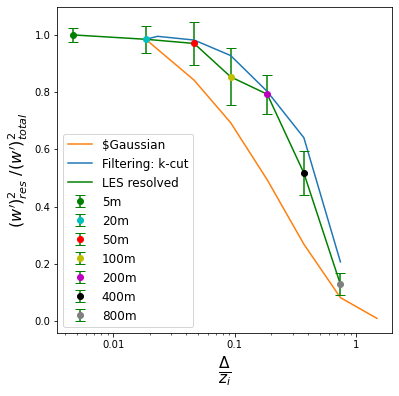

In [123]:
res = np.array([5, 20, 50, 100, 200, 400, 800])
res_20_new = np.array([20, 25, 50, 100, 200, 400, 800])

z_i = 1080
col_list = ['g', 'c', 'r', 'y', 'm', 'k', 'tab:gray', 'b']

plt.figure(figsize=(6,6))
plt.semilogx(delta_hat/z_i, w20_var/w_var_scale[0],'tab:orange', label="Gaussian")
#plt.semilogx(res_20_new/z_i, w20_var_new/w_var_scale[0],'k', label="20m Gaussian - match")
plt.semilogx(res_20_new/z_i, w20_var_k/w_var_scale[0],'tab:blue', label="Filtering: k-cut")
#plt.semilogx(delta_hat_g_dyn/z_i, w20_var_g_dyn/w_var_scale[0],'k', label="20m dyn Gaussian")
plt.semilogx(res/z_i, np.divide(np.array(w_var), np.array(w_var_scale)), 'g', label="LES resolved")
#plt.semilogx(delta_w_pi_over2_gauss_sq/z_i, w_pi_over2_gauss_sq/w_var_scale[0],'r', label="$\\pi$/2 Gaussian")

for i in range(len(res)):
    plt.errorbar(res[i]/z_i, w_var[i]/w_var[0], yerr=var_err[i]/w_var[0], label=str(res[i])+'m', 
                 color = col_list[i], ecolor='green', fmt='o', capsize=5)
    
plt.xlabel("$\\frac{\Delta}{z_i}$", fontsize=22)
plt.ylabel("$(w')^2_{res}$ $/(w')^2_{total}$", fontsize=16)
plt.legend(fontsize=12, loc='lower left')
plt.xticks(np.array([0.01, 0.1, 1]), [0.01, 0.1, 1])

plt.savefig(plot_dir+"20m_w_variance_matching_k.png")

In [ ]:
# res20_2 = [20,90,100,400,800,1600,4000,8000,12000,20000]
# res5_2 = [5,15,25,100,200,400,1000,2000,2500,4000]
res = np.array([5, 20, 50, 100, 200, 400, 800]) # [5, 20, 25, 50, 100, 200, 400, 800]
res_20_new = np.array([20, 25, 50, 100, 200, 400, 800])
                #5+f.sig_to_dx(3.2,0),20+f.sig_to_dx(12.8,0), 25+f.sig_to_dx(16,0),
                #50+f.sig_to_dx(32,0),100+f.sig_to_dx(64,0),200+f.sig_to_dx(128,0),
                #400+f.sig_to_dx(256,0),800+f.sig_to_dx(512,0)])

z_i = 1080

col_list = ['g', 'c', 'r', 'y', 'm', 'k', 'tab:gray', 'b']

plt.figure(figsize=(6,6))
#plt.semilogx(np.array(res5)/z_i, w5_var/w_var[0],'tab:orange', label="5m Gaussian")
plt.semilogx(res_20_new/z_i, w20_var_new/w_var_scale[0],'tab:orange', label="20m Filtered Gaussian")
#plt.semilogx(match_res/z_i, w20_var_new/w_var[1],'tab:orange', label="20m Filter Gauss")
plt.semilogx(res_20_new/z_i, w20_var_k/w_var_scale[0],'tab:blue', label="20m Filter k-cut")
#plt.semilogx(np.array(res_k)/z_i, w5k_var/w_var[0],'tab:blue', label="5m k-cuttoff")
#plt.semilogx(np.array(res5)/z_i, subgrid_w_5/w_var[0],'tab:orange', linestyle='--', label="5m subgrid")
#plt.semilogx(np.array(res20)/z_i, w20_var/w_var[1], 'b', label="20m")
# plt.semilogx(res5_2, w5_var, label="5m_2")
# plt.semilogx(res20_2, w2_filt, label="20m_2")
# plt.semilogx(res/z_i, np.divide(np.array(w_var_av), np.array(w_var_scale)), 'r', label="Av LES resolved")
plt.semilogx(res/z_i, np.divide(np.array(w_var), np.array(w_var_scale)), 'g', label="LES resolved")
#plt.semilogx(res, w_var, 'g', label="LES resolved")
# plt.errorbar(res[0]/z_i, w_var[0]/w_var_scale[0], yerr=var_err[0]/w_var[0], label=str(res[0])+'m', 
#                  color = col_list[0], ecolor='green', fmt='o', capsize=5)
for i in range(len(res)):
    plt.errorbar(res[i]/z_i, w_var[i]/w_var[0], yerr=var_err[i]/w_var[0], label=str(res[i])+'m', 
                 color = col_list[i], ecolor='green', fmt='o', capsize=5)
plt.xlabel("$\\frac{\Delta x}{z_i}$", fontsize=22)
plt.ylabel("$(w')^2_{res}$ $/(w')^2_{total}$", fontsize=16)
#plt.ylim(ymax=1.1, ymin=0.0)
#plt.xlim(xmax=4e3, xmin=3e0)
plt.legend(fontsize=12, loc='lower left')
plt.xticks(np.array([0.01, 0.1, 1]), [0.01, 0.1, 1])

plt.savefig(plot_dir+"20m_w_variance_matching_k.png")#("../plots/5m_w_variance_subgrid.png")

In [ ]:
print(res5)

In [ ]:
print(res20)

In [ ]:
#res20 = [20,90,100,400,800,1600,4000,8000,12000,20000]

plt.figure(figsize=(6,6))
plt.semilogx(res20, w2_filt)
plt.xlabel("Filter Scale", fontsize=14)
plt.ylabel("Varience of $w'$", fontsize=14)
#plt.ylim(ymax=1.8, ymin=0.0)
#plt.xlim(xmax=4e3, xmin=3e0)

plt.savefig(plot_dir+"20m_w_variance.png", pad_inches=0)

In [ ]:
res20 = [20,60,100,400,800,1600,4000,8000,12000,20000]

plt.figure(figsize=(6,6))
plt.semilogx(res20, w20_area)
plt.xlabel("Filter scale", fontsize=14)
plt.ylabel("Variance of $w'$", fontsize=14)
plt.ylim(ymax=1.8, ymin=-0.1)
#plt.xlim(xmax=4e3, xmin=3e0)

plt.savefig(plot_dir+"20m_w_variance_spec.png", pad_inches=0)

In [ ]:
print("calculated variance: w'^2", np.mean((w1[:,:,100])**2))

res = [5,15,25,100,200,400,1000,2000,2500,3000]

w_area = np.zeros(10)

w_area[0] = area_w = 2*integrate.simps(w_spec[:,100], w_kpo) 
print("spectrum w'", res[0], "m ", area_w)



for i in range(9):
    w_area[i+1] = filt_area_w = 2*integrate.simps(w_filt_spec[i,:,100], w_kpo) 
    print("spectrum w'", res[i+1], "m ", filt_area_w)

In [ ]:
print("calculated covariance: w'th'", np.mean((my_w_th[:,:,100])))

res = [5,15,25,100,200,400,1000,2000,2500,3000]

wth_area = np.zeros(10)

wth_area[0] = area_w = 2*integrate.simps(w_th_cospec[:,100], w_kpo) 
print("cospectrum w'th'", res[0], "m ", area_w)

for i in range(9):
    wth_area[i+1] = filt_area_w = 2*integrate.simps(w_th_filt_cospec[i,:,100], w_kpo) 
    print("cospectrum w'th'", res[i+1], "m ", filt_area_w)

In [ ]:
plt.figure(figsize=(6,6))
plt.semilogx(res, wth_area)
plt.xlabel("Filter scale", fontsize=14)
plt.ylabel("Covariance of $w' \\theta '$", fontsize=14)
#plt.ylim(ymax=1e4, ymin=1e-30)
#plt.xlim(xmax=1e0, xmin=1e-3)

plt.savefig(plot_dir+"gaus_wth_covariance.png", pad_inches=0)

In [ ]:
plt.figure(figsize=(6,6))
plt.semilogx(res, w_area)
plt.xlabel("Filter scale", fontsize=14)
plt.ylabel("Variance of $w'$", fontsize=14)
#plt.ylim(ymax=1e4, ymin=1e-30)
#plt.xlim(xmax=1e0, xmin=1e-3)

plt.savefig(plot_dir+"gaus_w_variance.png", pad_inches=0)

## Dissipation lengthscale

In [ ]:
k0w = min(w_filt_kpo[0,:])
k1w = max(w_filt_kpo[0,:])

In [ ]:
num_w = integrate.simps((w_kpo**2)*w_spec[:,100], w_kpo)
den_w = integrate.simps(w_spec[:,100], w_kpo)

In [ ]:
kd_w = np.sqrt(num_w/den_w)
ld_w = 2*np.pi/kd_w

In [ ]:
kd_wfilt = np.zeros(10)
ld_wfilt = np.zeros(10)

for i in range(9):
    num_w = integrate.simps((w_kpo**2)*w_filt_spec[i,:,100], w_kpo)
    den_w = integrate.simps(w_filt_spec[i,:,100], w_kpo)
    kd_wfilt[i+1] = np.sqrt(num_w/den_w)
    ld_wfilt[i+1] = 2*np.pi/kd_wfilt[i+1]

In [ ]:
kd_wfilt[0] = kd_w
ld_wfilt[0] = ld_w

In [ ]:
sigma_list = [0, 3, 5, 20, 40, 80, 200, 400, 600, 1000] #, 1500, 2000]

plt.figure(figsize=(6,6))
plt.plot(sigma_list,ld_wfilt)
plt.xlabel("$\\sigma$ value", fontsize=14)
plt.ylabel("Dissipation lengthscale (m)", fontsize=14)
#plt.ylim(ymax=1e4, ymin=1e-30)
#plt.xlim(xmax=1e0, xmin=1e-3)

plt.savefig(plot_dir+"gaus_w_diss_len.png", pad_inches=0)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(sigma_list, kd_wfilt)
plt.xlabel("$\\sigma$ value", fontsize=14)
plt.ylabel("Dissipation wavenumber", fontsize=14)
#plt.ylim(ymax=1e4, ymin=1e-30)
#plt.xlim(xmax=1e0, xmin=1e-3)

plt.savefig(plot_dir+"gaus_w_diss_k.png", pad_inches=0)

In [ ]:
kd_wfilt = np.zeros(11)
ld_wfilt = np.zeros(11)

for i in range(10):
    num_w_th = integrate.simps((w_kpo**2)*w_th_filt_cospec[i,:,100], w_kpo)
    den_w_th = integrate.simps(w_th_filt_cospec[i,:,100], w_kpo)
    kd_wthfilt[i+1] = np.sqrt(num_w/den_w)
    ld_wthfilt[i+1] = 2*np.pi/kd_wfilt[i+1]